LoG, DoG, DoH for blob detection, LBP

21BAI1061 - Pranav Mandava

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_doh

In [ ]:
def laplacian_of_gaussian(image, kernel_size=3, sigma=1.0):

  blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

  laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

  laplacian = cv2.convertScaleAbs(laplacian)

  return laplacian

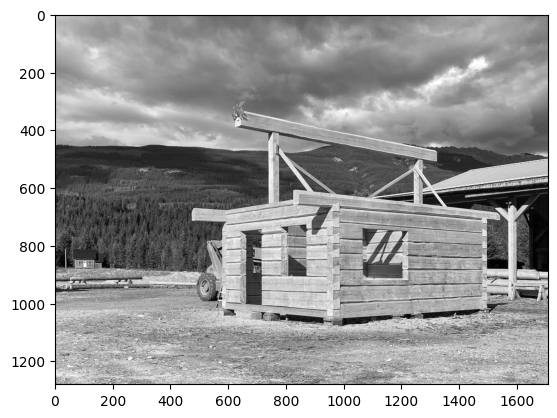

In [ ]:

image = cv2.imread('/content/drive/MyDrive/machine-vision/wood-house.jpg', cv2.IMREAD_GRAYSCALE)

log_image = laplacian_of_gaussian(image, kernel_size=5, sigma=1.5)


plt.imshow(image, cmap='gray')

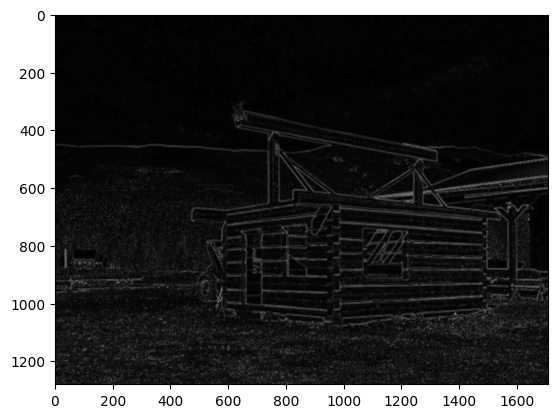

In [ ]:
plt.imshow( log_image, cmap='gray')

In [ ]:
def difference_of_gaussians(image, sigma1=1.0, sigma2=2.0):

  gaussian1 = cv2.GaussianBlur(image, (0, 0), sigma1)

  gaussian2 = cv2.GaussianBlur(image, (0, 0), sigma2)

  dog = gaussian1 - gaussian2

  return dog

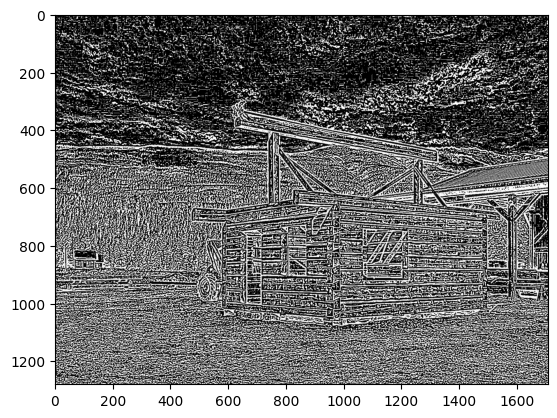

In [ ]:
dog_image = difference_of_gaussians(image)

plt.imshow(dog_image, cmap='gray')

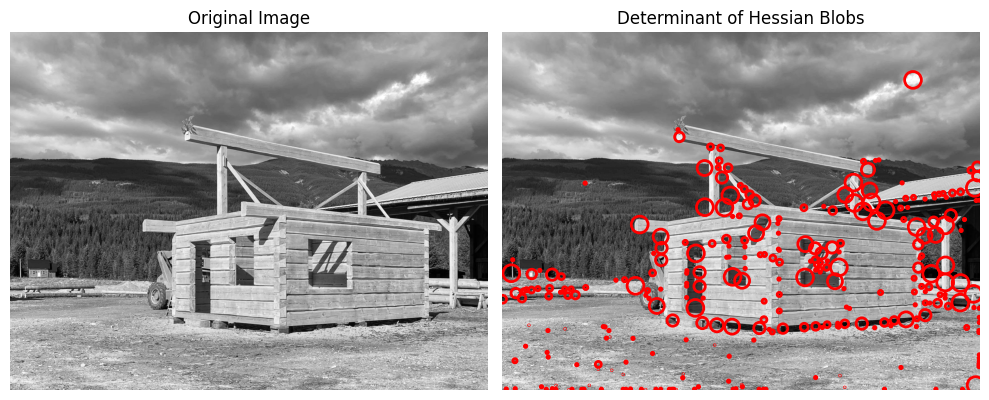

In [ ]:


blobs = blob_doh(image, max_sigma=30, threshold=0.005)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image, cmap='gray')
ax[1].set_title('Determinant of Hessian Blobs')
ax[1].axis('off')

for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax[1].add_patch(c)

plt.tight_layout()
plt.show()
